<a href="https://colab.research.google.com/github/minmincg/house_pricing_analysis/blob/main/Notebooks/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#Import the csv by using the raw link
hpricing_df_og = pd.read_csv("../Resources/austin_housing_reduced.csv")
hpricing_df_og.head()

,city,streetAddress,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasCooling,hasGarage,hasHeating,...,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,avgSchoolRating,numOfBathrooms,numOfBedrooms,numOfStories,numOfSchools
0,pflugerville,14424 Lake Victor Dr,78660,30.430632,-97.663078,1.98,2,True,True,True,...,0,1,0,6011.0,2601,2.666667,3.0,4,2,3
1,pflugerville,1104 Strickling Dr,78660,30.432672,-97.661697,1.98,2,True,True,True,...,0,0,0,6185.0,1768,2.666667,2.0,4,1,3
2,pflugerville,1408 Fort Dessau Rd,78660,30.409748,-97.639771,1.98,0,True,False,True,...,0,0,0,7840.0,1478,3.000000,2.0,3,1,4
3,pflugerville,1025 Strickling Dr,78660,30.432112,-97.661659,1.98,2,True,True,True,...,0,0,0,6098.0,1678,2.666667,2.0,3,1,3
4,pflugerville,15005 Donna Jane Loop,78660,30.437368,-97.656860,1.98,0,True,False,True,...,0,0,0,6708.0,2132,4.000000,3.0,3,2,3


In [2]:
# Determine the number of unique values in each column.
hpricing_df_og.nunique()

city                              9
streetAddress                 14937
zipcode                          48
latitude                      14218
longitude                     12344
propertyTaxRate                   3
garageSpaces                     14
hasCooling                        2
hasGarage                         2
hasHeating                        2
hasSpa                            2
hasView                           2
homeType                         10
yearBuilt                       115
latestPrice                    2329
numPriceChanges                  22
numOfAccessibilityFeatures        8
numOfAppliances                  13
numOfParkingFeatures              7
numOfPatioAndPorchFeatures        9
numOfSecurityFeatures             7
numOfWaterfrontFeatures           3
numOfWindowFeatures               5
numOfCommunityFeatures            9
lotSizeSqFt                    1371
livingAreaSqFt                 3611
avgSchoolRating                  27
numOfBathrooms              

In [3]:
column="propertyTaxRate"
hpricing_df_og[column].value_counts()

1.98    13537
2.21      853
2.01      554
Name: propertyTaxRate, dtype: int64

In [4]:
# Drop the non-beneficial ID columns, 'city' and 'streetAddress'.
hpricing_df = hpricing_df_og.drop(columns = ['city', 
                                             'streetAddress',
#                                              'latitude',
#                                              'longitude',
#                                              'numPriceChanges',
                                             'hasGarage',
                                             'homeType',
                                             'numOfParkingFeatures',
                                             'numOfWindowFeatures',
#                                              'zipcode',
#                                              'yearBuilt',
                                             'numOfAppliances',
#                                              'avgSchoolRating',
#                                              'numOfSchools'
                                            ], axis=1)
hpricing_df.head()

,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasCooling,hasHeating,hasSpa,hasView,yearBuilt,...,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,avgSchoolRating,numOfBathrooms,numOfBedrooms,numOfStories,numOfSchools
0,78660,30.430632,-97.663078,1.98,2,True,True,False,False,2012,...,3,0,0,6011.0,2601,2.666667,3.0,4,2,3
1,78660,30.432672,-97.661697,1.98,2,True,True,False,False,2013,...,0,0,0,6185.0,1768,2.666667,2.0,4,1,3
2,78660,30.409748,-97.639771,1.98,0,True,True,False,False,2018,...,1,0,0,7840.0,1478,3.000000,2.0,3,1,4
3,78660,30.432112,-97.661659,1.98,2,True,True,False,False,2013,...,0,0,0,6098.0,1678,2.666667,2.0,3,1,3
4,78660,30.437368,-97.656860,1.98,0,True,True,False,False,2002,...,0,0,0,6708.0,2132,4.000000,3.0,3,2,3


In [5]:
# Making sure the columns got dropped
hpricing_df.columns

Index(['zipcode', 'latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasCooling', 'hasHeating', 'hasSpa', 'hasView', 'yearBuilt',
       'latestPrice', 'numPriceChanges', 'numOfAccessibilityFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt',
       'livingAreaSqFt', 'avgSchoolRating', 'numOfBathrooms', 'numOfBedrooms',
       'numOfStories', 'numOfSchools'],
      dtype='object')

In [6]:
hpricing_df["isAccessible"]=hpricing_df["numOfAccessibilityFeatures"].map(lambda x:(1 if x>0 else 0))
hpricing_df["hasWaterfront"]=hpricing_df["numOfWaterfrontFeatures"].map(lambda x:(1 if x>0 else 0))
# hpricing_df["hasCommunityFeatures"]=hpricing_df["numOfCommunityFeatures"].map(lambda x:(1 if x>0 else 0))
hpricing_df=hpricing_df.drop([
                              "numOfAccessibilityFeatures",
                              "numOfWaterfrontFeatures",
                              "numOfCommunityFeatures"
                             ],
                             axis=1)

In [7]:
# Look at 'zipcode' value counts for binning
zip_counts = hpricing_df["zipcode"].value_counts()
zip_counts

78748    1135
78745    1022
78749     772
78704     688
78737     609
78739     603
78732     590
78759     558
78723     545
78757     517
78717     514
78731     482
78744     465
78753     437
78727     414
78754     393
78758     389
78747     381
78702     379
78750     321
78729     317
78735     308
78703     292
78721     244
78730     243
78724     223
78728     223
78741     213
78733     202
78746     187
78726     178
78751     172
78736     162
78725     162
78752     151
78756     137
78722      95
78617      85
78705      58
78660      36
78619      12
78734       9
78719       5
78652       4
78653       4
78742       4
78701       3
78738       1
Name: zipcode, dtype: int64

In [8]:
# Choose a cutoff value of less than 200 and create a list of application types to be replaced

zipcodes_to_replace = list(zip_counts[zip_counts<200].index)

# Replace in dataframe
for zip in zipcodes_to_replace:
    hpricing_df['zipcode'] = hpricing_df['zipcode'].replace(zip,"Other")

# Making sure the binning was successful
hpricing_df['zipcode'].value_counts()

Other    1465
78748    1135
78745    1022
78749     772
78704     688
78737     609
78739     603
78732     590
78759     558
78723     545
78757     517
78717     514
78731     482
78744     465
78753     437
78727     414
78754     393
78758     389
78747     381
78702     379
78750     321
78729     317
78735     308
78703     292
78721     244
78730     243
78724     223
78728     223
78741     213
78733     202
Name: zipcode, dtype: int64

In [9]:
#Check data types
hpricing_df.dtypes

zipcode                        object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasCooling                       bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
yearBuilt                       int64
latestPrice                     int64
numPriceChanges                 int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
lotSizeSqFt                   float64
livingAreaSqFt                  int64
avgSchoolRating               float64
numOfBathrooms                float64
numOfBedrooms                   int64
numOfStories                    int64
numOfSchools                    int64
isAccessible                    int64
hasWaterfront                   int64
dtype: object

In [10]:
hpricing_df.columns
print("Length:",len(hpricing_df.columns),hpricing_df.columns)

Length: 23 Index(['zipcode', 'latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasCooling', 'hasHeating', 'hasSpa', 'hasView', 'yearBuilt',
       'latestPrice', 'numPriceChanges', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'avgSchoolRating', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories',
       'numOfSchools', 'isAccessible', 'hasWaterfront'],
      dtype='object')


In [11]:
hpricing_df=hpricing_df[["latitude",
                         "longitude",
                         "zipcode",
                         "propertyTaxRate",
                         "yearBuilt",
                         "numPriceChanges",
                         "avgSchoolRating",
                         "numOfSchools",
                         "lotSizeSqFt",
                         "livingAreaSqFt",
                         "numOfPatioAndPorchFeatures",
                         "numOfSecurityFeatures",
                         "numOfBedrooms",
                         "numOfBathrooms",
                         "numOfStories",
                         "garageSpaces",
                         "hasCooling",
                         "hasHeating",
                         "hasView",
                         "hasSpa",
                         "isAccessible",
                         "hasWaterfront",
                         "latestPrice"]]
hpricing_df.columns

Index(['latitude', 'longitude', 'zipcode', 'propertyTaxRate', 'yearBuilt',
       'numPriceChanges', 'avgSchoolRating', 'numOfSchools', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfBedrooms', 'numOfBathrooms', 'numOfStories', 'garageSpaces',
       'hasCooling', 'hasHeating', 'hasView', 'hasSpa', 'isAccessible',
       'hasWaterfront', 'latestPrice'],
      dtype='object')

In [12]:
hpricing_df.iloc[1].values

array([30.4326725, -97.66169739, 'Other', 1.98, 2013, 1, 2.666666667, 3,
       6185.0, 1768, 0, 0, 4, 2.0, 1, 2, True, True, False, False, 0, 0,
       295000], dtype=object)

In [13]:
#Convert zipcode to dummies because it is a categorical
#Didnt use dummies in the rest of the data (hasCooling, hasGarage, hasHeating, hasSpa, hasView) because it was already numerical
hpricing_df = pd.get_dummies(hpricing_df,dtype=float)
hpricing_df


,latitude,longitude,propertyTaxRate,yearBuilt,numPriceChanges,avgSchoolRating,numOfSchools,lotSizeSqFt,livingAreaSqFt,numOfPatioAndPorchFeatures,...,zipcode_78747,zipcode_78748,zipcode_78749,zipcode_78750,zipcode_78753,zipcode_78754,zipcode_78757,zipcode_78758,zipcode_78759,zipcode_Other
0,30.430632,-97.663078,1.98,2012,5,2.666667,3,6011.0,2601,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,30.432672,-97.661697,1.98,2013,1,2.666667,3,6185.0,1768,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30.409748,-97.639771,1.98,2018,1,3.000000,4,7840.0,1478,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,30.432112,-97.661659,1.98,2013,4,2.666667,3,6098.0,1678,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.437368,-97.656860,1.98,2002,3,4.000000,3,6708.0,2132,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14939,30.161997,-97.816345,1.98,1986,1,3.333333,3,6534.0,1234,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14940,30.240223,-97.772835,1.98,2016,1,6.666667,3,2439.0,1888,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14941,30.244835,-97.761124,1.98,1936,7,5.000000,3,9408.0,1524,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14942,30.281569,-97.717789,1.98,1968,5,6.666667,3,6098.0,6068,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
hpricing_df.columns

Index(['latitude', 'longitude', 'propertyTaxRate', 'yearBuilt',
       'numPriceChanges', 'avgSchoolRating', 'numOfSchools', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfBedrooms', 'numOfBathrooms', 'numOfStories', 'garageSpaces',
       'hasCooling', 'hasHeating', 'hasView', 'hasSpa', 'isAccessible',
       'hasWaterfront', 'latestPrice', 'zipcode_78702', 'zipcode_78703',
       'zipcode_78704', 'zipcode_78717', 'zipcode_78721', 'zipcode_78723',
       'zipcode_78724', 'zipcode_78727', 'zipcode_78728', 'zipcode_78729',
       'zipcode_78730', 'zipcode_78731', 'zipcode_78732', 'zipcode_78733',
       'zipcode_78735', 'zipcode_78737', 'zipcode_78739', 'zipcode_78741',
       'zipcode_78744', 'zipcode_78745', 'zipcode_78747', 'zipcode_78748',
       'zipcode_78749', 'zipcode_78750', 'zipcode_78753', 'zipcode_78754',
       'zipcode_78757', 'zipcode_78758', 'zipcode_78759', 'zipcode_Other'],
      dtype='object')

In [15]:
hpricing_df.iloc[0].values

array([30.43063164, -97.66307831, 1.98, 2012, 5, 2.666666667, 3, 6011.0,
       2601, 1, 3, 4, 3.0, 2, 2, True, True, False, False, 0, 0, 305000,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0], dtype=object)

In [16]:
# Split our preprocessed data into our features and target arrays
y= hpricing_df['latestPrice'].values

X= hpricing_df.drop ('latestPrice', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                4160      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,621
Trainable params: 6,621
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
#mae = mean absolute error & mse = mean squared error
nn.compile(loss="mse", optimizer="adam", metrics=["mae", "mse"])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=500)

Epoch 1/500
351/351 [==============================] - 1s 2ms/step - loss: 420612636672.0000 - mae: 509311.5000 - mse: 420612636672.0000
Epoch 2/500
351/351 [==============================] - 1s 2ms/step - loss: 414766497792.0000 - mae: 505368.0312 - mse: 414766497792.0000
Epoch 3/500
351/351 [==============================] - 1s 2ms/step - loss: 393460940800.0000 - mae: 491264.9688 - mse: 393460940800.0000
Epoch 4/500
351/351 [==============================] - 1s 2ms/step - loss: 352076890112.0000 - mae: 462289.8125 - mse: 352076890112.0000
Epoch 5/500
351/351 [==============================] - 0s 1ms/step - loss: 296447639552.0000 - mae: 417680.0000 - mse: 296447639552.0000
Epoch 6/500
351/351 [==============================] - 0s 1ms/step - loss: 239428829184.0000 - mae: 364409.5312 - mse: 239428829184.0000
Epoch 7/500
351/351 [==============================] - 0s 1ms/step - loss: 192174620672.0000 - mae: 318474.9375 - mse: 192174620672.0000
Epoch 8/500
351/351 [====================

351/351 [==============================] - 1s 4ms/step - loss: 50046885888.0000 - mae: 115058.7266 - mse: 50046885888.0000
Epoch 62/500
351/351 [==============================] - 1s 4ms/step - loss: 49891463168.0000 - mae: 114589.3750 - mse: 49891463168.0000
Epoch 63/500
351/351 [==============================] - 1s 3ms/step - loss: 49760428032.0000 - mae: 114458.7344 - mse: 49760428032.0000
Epoch 64/500
351/351 [==============================] - 1s 3ms/step - loss: 49582325760.0000 - mae: 114185.1172 - mse: 49582325760.0000
Epoch 65/500
351/351 [==============================] - 1s 3ms/step - loss: 49473077248.0000 - mae: 113972.1719 - mse: 49473077248.0000
Epoch 66/500
351/351 [==============================] - 1s 3ms/step - loss: 49313222656.0000 - mae: 114111.6797 - mse: 49313222656.0000
Epoch 67/500
351/351 [==============================] - 1s 3ms/step - loss: 49177731072.0000 - mae: 114016.6484 - mse: 49177731072.0000
Epoch 68/500
351/351 [==============================] - 1s 3m

351/351 [==============================] - 1s 4ms/step - loss: 45068324864.0000 - mae: 107710.7109 - mse: 45068324864.0000
Epoch 122/500
351/351 [==============================] - 1s 4ms/step - loss: 45003259904.0000 - mae: 107566.9609 - mse: 45003259904.0000
Epoch 123/500
351/351 [==============================] - 1s 4ms/step - loss: 44951085056.0000 - mae: 107335.8828 - mse: 44951085056.0000
Epoch 124/500
351/351 [==============================] - 1s 3ms/step - loss: 44911185920.0000 - mae: 107383.0156 - mse: 44911185920.0000
Epoch 125/500
351/351 [==============================] - 1s 4ms/step - loss: 44857950208.0000 - mae: 107161.4688 - mse: 44857950208.0000
Epoch 126/500
351/351 [==============================] - 1s 4ms/step - loss: 44828577792.0000 - mae: 107354.0625 - mse: 44828577792.0000
Epoch 127/500
351/351 [==============================] - 1s 4ms/step - loss: 44753899520.0000 - mae: 107167.1172 - mse: 44753899520.0000
Epoch 128/500
351/351 [==============================] 

351/351 [==============================] - 1s 3ms/step - loss: 42942992384.0000 - mae: 103584.9844 - mse: 42942992384.0000
Epoch 181/500
351/351 [==============================] - 1s 3ms/step - loss: 42899144704.0000 - mae: 103331.6406 - mse: 42899144704.0000
Epoch 182/500
351/351 [==============================] - 1s 4ms/step - loss: 42895142912.0000 - mae: 103394.0312 - mse: 42895142912.0000
Epoch 183/500
351/351 [==============================] - 1s 4ms/step - loss: 42868695040.0000 - mae: 103717.8047 - mse: 42868695040.0000
Epoch 184/500
351/351 [==============================] - 1s 4ms/step - loss: 42830123008.0000 - mae: 103023.7031 - mse: 42830123008.0000
Epoch 185/500
351/351 [==============================] - 1s 3ms/step - loss: 42784661504.0000 - mae: 103527.7734 - mse: 42784661504.0000
Epoch 186/500
351/351 [==============================] - 1s 3ms/step - loss: 42768453632.0000 - mae: 103301.6797 - mse: 42768453632.0000
Epoch 187/500
351/351 [==============================] 

351/351 [==============================] - 1s 4ms/step - loss: 41696415744.0000 - mae: 101206.0078 - mse: 41696415744.0000
Epoch 240/500
351/351 [==============================] - 1s 4ms/step - loss: 41678213120.0000 - mae: 100908.7578 - mse: 41678213120.0000
Epoch 241/500
351/351 [==============================] - 1s 4ms/step - loss: 41664151552.0000 - mae: 101116.1484 - mse: 41664151552.0000
Epoch 242/500
351/351 [==============================] - 1s 3ms/step - loss: 41640333312.0000 - mae: 101205.8281 - mse: 41640333312.0000
Epoch 243/500
351/351 [==============================] - 1s 4ms/step - loss: 41649676288.0000 - mae: 100885.5156 - mse: 41649676288.0000
Epoch 244/500
351/351 [==============================] - 1s 4ms/step - loss: 41611874304.0000 - mae: 100991.3359 - mse: 41611874304.0000
Epoch 245/500
351/351 [==============================] - 1s 4ms/step - loss: 41605398528.0000 - mae: 100890.3203 - mse: 41605398528.0000
Epoch 246/500
351/351 [==============================] 

Epoch 299/500
351/351 [==============================] - 1s 2ms/step - loss: 40853831680.0000 - mae: 99542.0625 - mse: 40853831680.0000
Epoch 300/500
351/351 [==============================] - 1s 2ms/step - loss: 40839700480.0000 - mae: 99619.8906 - mse: 40839700480.0000
Epoch 301/500
351/351 [==============================] - 1s 3ms/step - loss: 40841998336.0000 - mae: 99644.0625 - mse: 40841998336.0000
Epoch 302/500
351/351 [==============================] - 1s 3ms/step - loss: 40819130368.0000 - mae: 99593.5703 - mse: 40819130368.0000
Epoch 303/500
351/351 [==============================] - 1s 2ms/step - loss: 40811630592.0000 - mae: 99745.2109 - mse: 40811630592.0000
Epoch 304/500
351/351 [==============================] - 1s 2ms/step - loss: 40774889472.0000 - mae: 99664.6719 - mse: 40774889472.0000
Epoch 305/500
351/351 [==============================] - 1s 2ms/step - loss: 40796102656.0000 - mae: 99171.7812 - mse: 40796102656.0000
Epoch 306/500
351/351 [=========================

351/351 [==============================] - 1s 2ms/step - loss: 40169820160.0000 - mae: 98420.4766 - mse: 40169820160.0000
Epoch 360/500
351/351 [==============================] - 1s 2ms/step - loss: 40154148864.0000 - mae: 98368.7969 - mse: 40154148864.0000
Epoch 361/500
351/351 [==============================] - 1s 2ms/step - loss: 40136601600.0000 - mae: 98228.2266 - mse: 40136601600.0000
Epoch 362/500
351/351 [==============================] - 1s 2ms/step - loss: 40130252800.0000 - mae: 98370.4297 - mse: 40130252800.0000
Epoch 363/500
351/351 [==============================] - 1s 2ms/step - loss: 40110784512.0000 - mae: 98181.2500 - mse: 40110784512.0000
Epoch 364/500
351/351 [==============================] - 1s 2ms/step - loss: 40105107456.0000 - mae: 98402.4453 - mse: 40105107456.0000
Epoch 365/500
351/351 [==============================] - 1s 2ms/step - loss: 40094736384.0000 - mae: 98072.0547 - mse: 40094736384.0000
Epoch 366/500
351/351 [==============================] - 1s 2m

351/351 [==============================] - 1s 3ms/step - loss: 39594958848.0000 - mae: 97291.1484 - mse: 39594958848.0000
Epoch 420/500
351/351 [==============================] - 1s 2ms/step - loss: 39578673152.0000 - mae: 97041.7031 - mse: 39578673152.0000
Epoch 421/500
351/351 [==============================] - 1s 3ms/step - loss: 39600664576.0000 - mae: 97271.3672 - mse: 39600664576.0000
Epoch 422/500
351/351 [==============================] - 1s 3ms/step - loss: 39561424896.0000 - mae: 97376.7891 - mse: 39561424896.0000
Epoch 423/500
351/351 [==============================] - 1s 3ms/step - loss: 39573168128.0000 - mae: 97015.5156 - mse: 39573168128.0000
Epoch 424/500
351/351 [==============================] - 1s 2ms/step - loss: 39555342336.0000 - mae: 97321.4531 - mse: 39555342336.0000
Epoch 425/500
351/351 [==============================] - 1s 3ms/step - loss: 39543136256.0000 - mae: 97024.4219 - mse: 39543136256.0000
Epoch 426/500
351/351 [==============================] - 1s 3m

351/351 [==============================] - 1s 2ms/step - loss: 39101296640.0000 - mae: 96237.6562 - mse: 39101296640.0000
Epoch 480/500
351/351 [==============================] - 1s 1ms/step - loss: 39073837056.0000 - mae: 96209.9609 - mse: 39073837056.0000
Epoch 481/500
351/351 [==============================] - 1s 2ms/step - loss: 39066529792.0000 - mae: 96487.0781 - mse: 39066529792.0000
Epoch 482/500
351/351 [==============================] - 1s 2ms/step - loss: 39058395136.0000 - mae: 96076.8906 - mse: 39058395136.0000
Epoch 483/500
351/351 [==============================] - 1s 2ms/step - loss: 39038967808.0000 - mae: 96360.6016 - mse: 39038967808.0000
Epoch 484/500
351/351 [==============================] - 1s 2ms/step - loss: 39045615616.0000 - mae: 96020.1797 - mse: 39045615616.0000
Epoch 485/500
351/351 [==============================] - 1s 1ms/step - loss: 39031463936.0000 - mae: 96107.2344 - mse: 39031463936.0000
Epoch 486/500
351/351 [==============================] - 1s 2m

In [21]:
# Evaluate the model using the test data
errors = nn.evaluate(X_test_scaled,y_test,verbose=2)
errors
print(f"MSE: {errors [0]}, MAE: {errors[1]}")

117/117 - 0s - loss: 35104870400.0000 - mae: 97185.8594 - mse: 35104870400.0000 - 436ms/epoch - 4ms/step
MSE: 35104870400.0, MAE: 97185.859375


In [22]:
# Evaluate the model using the test data
errors = nn.evaluate(X_test_scaled,y_test,verbose=2)
errors
print(f"MSE: {errors [0]}, MAE: {errors[1]}")

117/117 - 0s - loss: 35104870400.0000 - mae: 97185.8594 - mse: 35104870400.0000 - 249ms/epoch - 2ms/step
MSE: 35104870400.0, MAE: 97185.859375


In [23]:
# Export our model to HDF5 file
nn.save("../Resources/nn/neural_network.h5")

In [24]:
# Export standardScaler from sklearn to file
from joblib import dump, load
dump(scaler, '../Resources/nn/std_scaler.bin', compress=True)

['../Resources/nn/std_scaler.bin']

## Predict prices for original table

In [25]:
X_scaled=scaler.transform(X)
predict_price_nn=nn.predict(X_scaled).flatten()
predict_price_nn

467/467 [==============================] - 1s 2ms/step


array([ 367087.8 ,  224974.3 ,  211900.42, ...,  674674.8 , 1736708.  ,
        411731.6 ], dtype=float32)

In [26]:
hpricing_extra_nn=pd.DataFrame()
hpricing_extra_nn["predict_price_nn"]=predict_price_nn
hpricing_extra_nn["latestPrice"]=hpricing_df_og["latestPrice"]
hpricing_extra_nn["difference_nn"]=hpricing_extra_nn["latestPrice"]-hpricing_extra_nn["predict_price_nn"]
hpricing_extra_nn["percent_change_nn"]=round(hpricing_extra_nn["difference_nn"]*100/hpricing_extra_nn["latestPrice"],2)
hpricing_extra_nn.head(10)

,predict_price_nn,latestPrice,difference_nn,percent_change_nn
0,367087.812500,305000,-62087.812500,-20.36
1,224974.296875,295000,70025.703125,23.74
2,211900.421875,256125,44224.578125,17.27
3,202007.890625,240000,37992.109375,15.83
4,294366.406250,239900,-54466.406250,-22.70
5,314922.625000,309045,-5877.625000,-1.90
6,402179.187500,315000,-87179.187500,-27.68
7,175887.140625,219900,44012.859375,20.01
8,269432.593750,225000,-44432.593750,-19.75
9,210145.203125,194800,-15345.203125,-7.88


In [27]:
hpricing_extra_nn.drop(columns=["latestPrice"],inplace=True)
hpricing_extra_nn.head(5)

,predict_price_nn,difference_nn,percent_change_nn
0,367087.812500,-62087.812500,-20.36
1,224974.296875,70025.703125,23.74
2,211900.421875,44224.578125,17.27
3,202007.890625,37992.109375,15.83
4,294366.406250,-54466.406250,-22.70


In [28]:
hpricing_extra_nn.to_csv("../Resources/austin_extra_nn.csv",index=False)

In [29]:
hpricing_extra_nn.mean()

predict_price_nn     509192.482950
difference_nn          -640.664896
percent_change_nn        -6.814303
dtype: float64

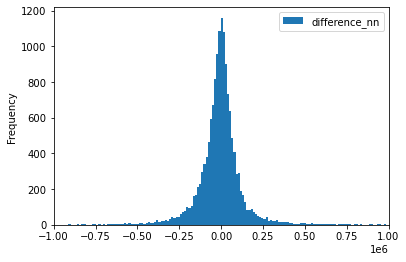

In [30]:
import matplotlib.pyplot as plt
hpricing_extra_nn_to_plot=hpricing_extra_nn[["difference_nn"]]
hpricing_extra_nn_to_plot.plot.hist("difference_nn",bins=500)
plt.xlim(-1000000,1000000)
plt.show()

In [31]:
hpricing_extra_nn.sort_values(by="difference_nn",ascending=False)

,predict_price_nn,difference_nn,percent_change_nn
14415,2693394.50,3556605.50,56.91
14189,3458685.50,3040314.50,46.78
1146,506923.00,2992077.00,85.51
59,2736664.75,2758335.25,50.20
193,2775783.50,2699213.50,49.30
...,...,...,...
12572,2735100.50,-1840100.50,-205.60
880,2303650.25,-1908650.25,-483.20
4706,4231531.00,-2041531.00,-93.22
14292,3452702.50,-2053702.50,-146.80


In [32]:
hpricing_df

,latitude,longitude,propertyTaxRate,yearBuilt,numPriceChanges,avgSchoolRating,numOfSchools,lotSizeSqFt,livingAreaSqFt,numOfPatioAndPorchFeatures,...,zipcode_78747,zipcode_78748,zipcode_78749,zipcode_78750,zipcode_78753,zipcode_78754,zipcode_78757,zipcode_78758,zipcode_78759,zipcode_Other
0,30.430632,-97.663078,1.98,2012,5,2.666667,3,6011.0,2601,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,30.432672,-97.661697,1.98,2013,1,2.666667,3,6185.0,1768,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30.409748,-97.639771,1.98,2018,1,3.000000,4,7840.0,1478,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,30.432112,-97.661659,1.98,2013,4,2.666667,3,6098.0,1678,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.437368,-97.656860,1.98,2002,3,4.000000,3,6708.0,2132,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14939,30.161997,-97.816345,1.98,1986,1,3.333333,3,6534.0,1234,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14940,30.240223,-97.772835,1.98,2016,1,6.666667,3,2439.0,1888,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14941,30.244835,-97.761124,1.98,1936,7,5.000000,3,9408.0,1524,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14942,30.281569,-97.717789,1.98,1968,5,6.666667,3,6098.0,6068,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
